In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as md
import seaborn as sns
import plotly.express as px

plt.style.use('seaborn')

/var/folders/_j/x8h1yttn1s76k8f3bvjm72rw0000gn/T/ipykernel_30733/1510254906.py:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [2]:
eda_data = pd.read_csv('data/EDA_data.csv')
eda_data

days_to_depart  flight_day_of_week startingAirport destinationAirport  \
0                  44                   3             LAX                ORD   
1                  44                   3             LAX                ORD   
2                  44                   3             LAX                ORD   
3                  44                   3             LAX                ORD   
4                  44                   3             LAX                ORD   
...               ...                 ...             ...                ...   
88784              53                   5             ATL                ORD   
88785              53                   5             ATL                ORD   
88786              53                   5             ATL                ORD   
88787              53                   5             ATL                ORD   
88788              53                   5             ATL                ORD   

      departure_time arriving_time  isDeparture_time_6to18  \
0           12:55:00      00:54:00                    True   
1           15:21:00      21:24:00                    True   
2           07:00:00      13:04:00                    True   
3           20:25:00      04:13:00                   False   
4           19:25:00      04:13:00                   False   
...              ...           ...                     ...   
88784       11:18:00      16:05:00                    True   
88785       12:24:00      17:15:00                    True   
88786       11:42:00      17:49:00                    True   
88787       17:45:00      18:59:00                    True   
88788       18:15:00      21:06:00                   False   

       isArriving_time_11to24  stops          route  ... travelDuration_h  \
0                       False      1  LAX->DFW->ORD  ...         9.983333   
1                        True      0       LAX->ORD  ...         4.050000   
2                        True      0       LAX->ORD  ...         4.066667   
3                       False      1  LAX->LAS->ORD  ...         5.800000   
4                       False      1  LAX->LAS->ORD  ...         6.800000   
...                       ...    ...            ...  ...              ...   
88784                    True      1  ATL->DCA->ORD  ...         5.783333   
88785                    True      1  ATL->DFW->ORD  ...         5.850000   
88786                    True      1  ATL->JFK->ORD  ...         7.116667   
88787                    True      0       ATL->ORD  ...         2.233333   
88788                    True      1  ATL->DTW->ORD  ...         3.850000   

      elapsedDays  isBasicEconomy  isRefundable  isNonStop  seatsRemaining  \
0               1           False         False      False               0   
1               0           False         False       True               0   
2               0           False         False       True               0   
3               1           False         False      False               0   
4               1           False         False      False               0   
...           ...             ...           ...        ...             ...   
88784           0           False         False      False               7   
88785           0           False         False      False               7   
88786           0           False         False      False               7   
88787           0           False         False       True               9   
88788           0           False         False      False               9   

       totalTravelDistance  total_waiting_time  baseFare  totalFare  
0                      NaN                4.37     21.11      91.29  
1                      NaN                0.00     43.00      99.89  
2                      NaN                0.00     43.00      99.89  
3                      NaN                0.92     33.00     103.18  
4                      NaN                1.92     33.00     103.18  
...                

In [3]:
coach_df = eda_data.loc[eda_data['class'] == 'coach'].reset_index(drop=True)
coach_df['departure_time'] = pd.to_datetime(coach_df['departure_time'])
coach_df['arriving_time'] = pd.to_datetime(coach_df['arriving_time'])

# lax_ord_coach['departure_time'] = lax_ord_coach['departure_time'].dt.strftime('%H:%M:%S')
coach_df_selected = coach_df.loc[(coach_df['route'] == 'LAX->ORD') | (coach_df['route'] == 'LAX->ATL') | (
            coach_df['route'] == 'LAX->DFW') | (coach_df['route'] == 'LAX->JFK')]

In [4]:
coach_df_selected

days_to_depart  flight_day_of_week startingAirport destinationAirport  \
1                  44                   3             LAX                ORD   
2                  44                   3             LAX                ORD   
20                 44                   3             LAX                ORD   
21                 44                   3             LAX                ORD   
22                 44                   3             LAX                ORD   
...               ...                 ...             ...                ...   
88083              53                   5             LAX                JFK   
88088              53                   5             LAX                JFK   
88089              53                   5             LAX                JFK   
88091              53                   5             LAX                JFK   
88092              53                   5             LAX                JFK   

           departure_time       arriving_time  isDeparture_time_6to18  \
1     2023-04-10 15:21:00 2023-04-10 21:24:00                    True   
2     2023-04-10 07:00:00 2023-04-10 13:04:00                    True   
20    2023-04-10 07:45:00 2023-04-10 13:50:00                    True   
21    2023-04-10 07:00:00 2023-04-10 13:05:00                    True   
22    2023-04-10 17:40:00 2023-04-10 23:51:00                    True   
...                   ...                 ...                     ...   
88083 2023-04-10 07:00:00 2023-04-10 15:40:00                    True   
88088 2023-04-10 09:15:00 2023-04-10 17:59:00                    True   
88089 2023-04-10 23:29:00 2023-04-10 08:00:00                   False   
88091 2023-04-10 22:17:00 2023-04-10 06:51:00                   False   
88092 2023-04-10 22:17:00 2023-04-10 06:51:00                   False   

       isArriving_time_11to24  stops     route  ... travelDuration_h  \
1                        True      0  LAX->ORD  ...         4.050000   
2                        True      0  LAX->ORD  ...         4.066667   
20                       True      0  LAX->ORD  ...         4.083333   
21                       True      0  LAX->ORD  ...         4.083333   
22                       True      0  LAX->ORD  ...         4.183333   
...                       ...    ...       ...  ...              ...   
88083                    True      0  LAX->JFK  ...         5.666667   
88088                    True      0  LAX->JFK  ...         5.733333   
88089                   False      0  LAX->JFK  ...         5.516667   
88091                   False      0  LAX->JFK  ...         5.566667   
88092                   False      0  LAX->JFK  ...         5.566667   

      elapsedDays  isBasicEconomy  isRefundable  isNonStop  seatsRemaining  \
1               0           False         False       True               0   
2               0           False         False       True               0   
20              0           False         False       True               7   
21              0            True         False       True               9   
22              0            True         False       True               9   
...           ...             ...           ...        ...             ...   
88083           0           False         False       True               7   
88088           0           False         False       True               9   
88089           1           False         False       True               7   
88091           1           False         False       True               7   
88092           1           False         False       True               7   

       totalTravelDistance  total_waiting_time  baseFare  totalFare  
1                      NaN                 0.0     43.00      99.89  
2                      NaN                 0.0     43.00      99.89  
20                  1745.0                 0.0    191.63     220.90  
21                  1745.0                 0.0    191.63     220.90  
22               

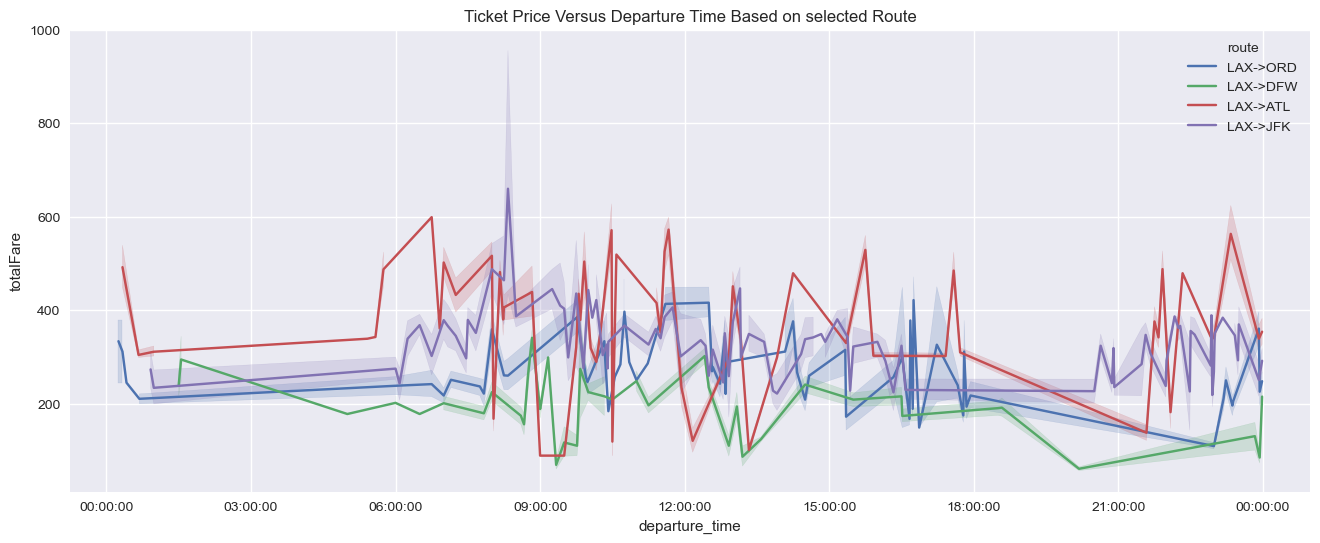

In [5]:
def plot_price_vs_time(df, name):
    fig, ax = plt.subplots(figsize=(16, 6))
    sns.lineplot(y="totalFare", x=name, data=df, hue='route')
    ax.set_xlim(df[name].min() - pd.Timedelta(1, 'h'),
                df[name].max() + pd.Timedelta(1, 'h'))
    ax.xaxis.set_major_formatter(md.DateFormatter('%H:%M:%S'))
    plt.title('Ticket Price Versus Departure Time Based on selected Route')
    plt.show()
plot_price_vs_time(coach_df_selected, name='departure_time')

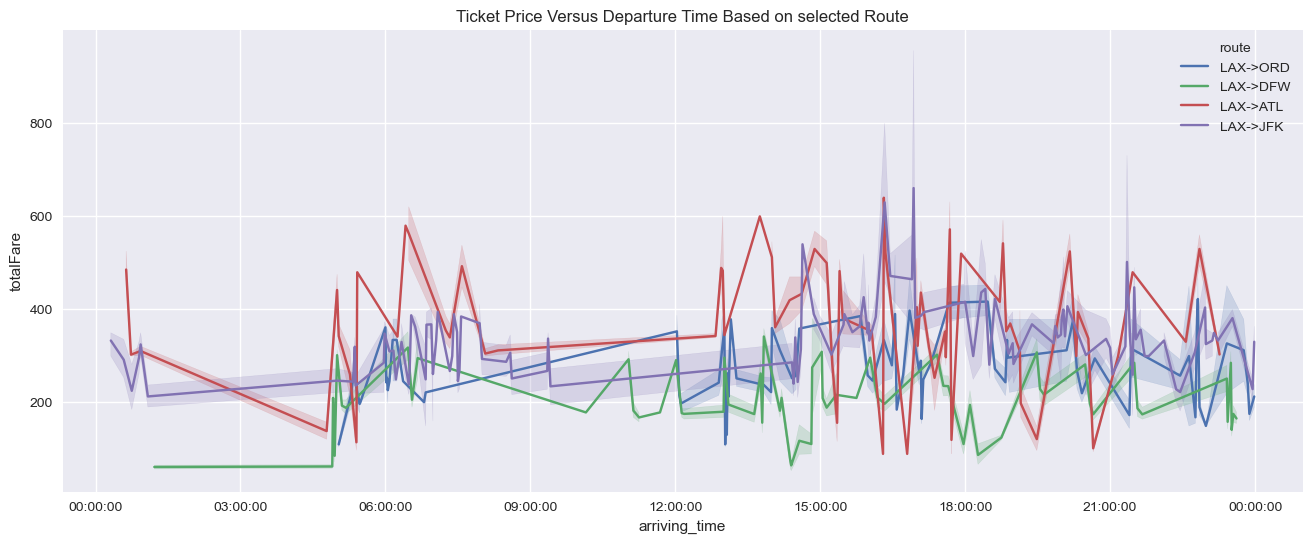

In [6]:
plot_price_vs_time(coach_df_selected, name='arriving_time')

Above plot indicating that we may split the departure time in groups, say 6-18, others.

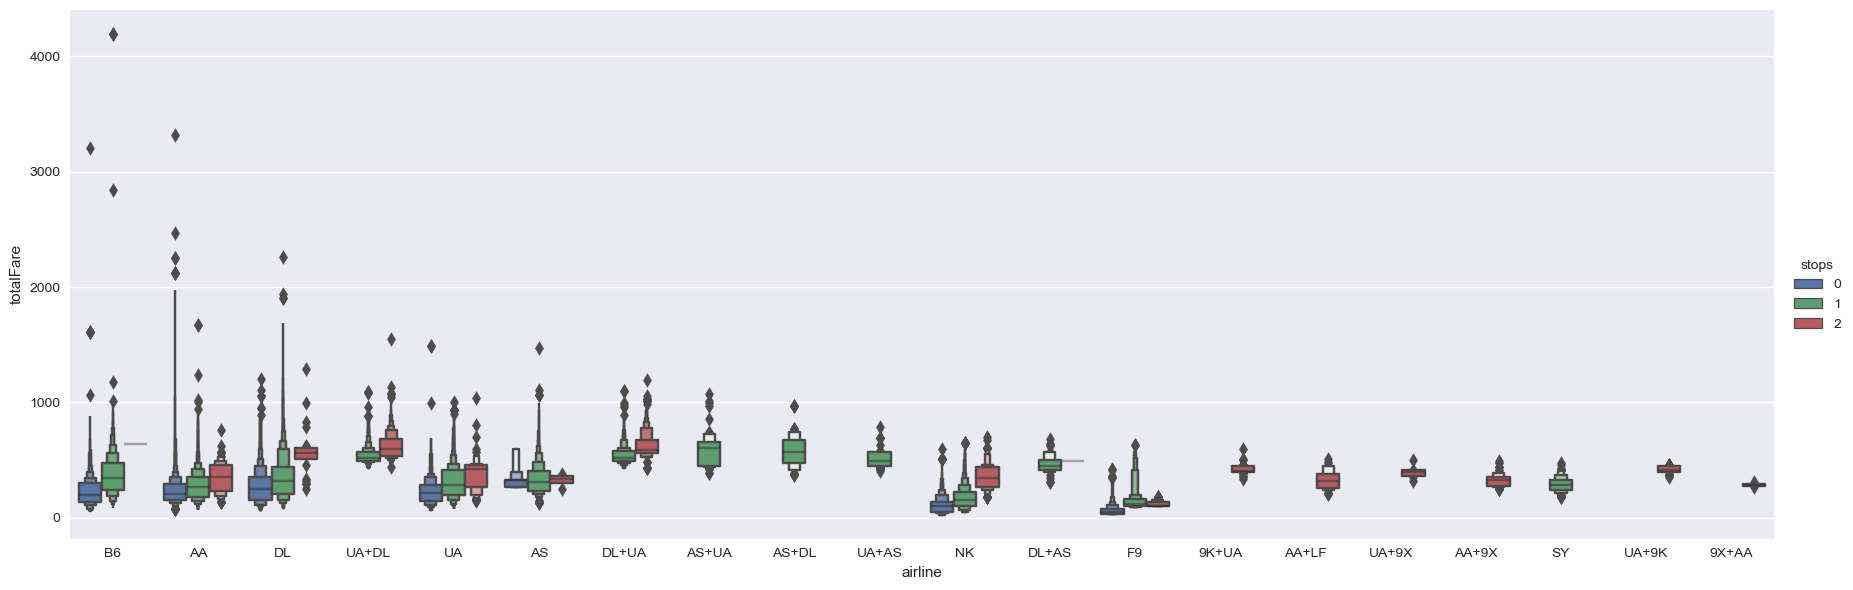

In [7]:
sns.catplot(y="totalFare", x="airline", data=eda_data.sort_values("totalFare", ascending=False), hue='stops',
            kind="boxen", height=6, aspect=3)
plt.show()

We need to indentify is the outlier always the bussines/ first, or on specific airline?

From the plot we find that the large price may not only depend on the class, but class is a viable variable.

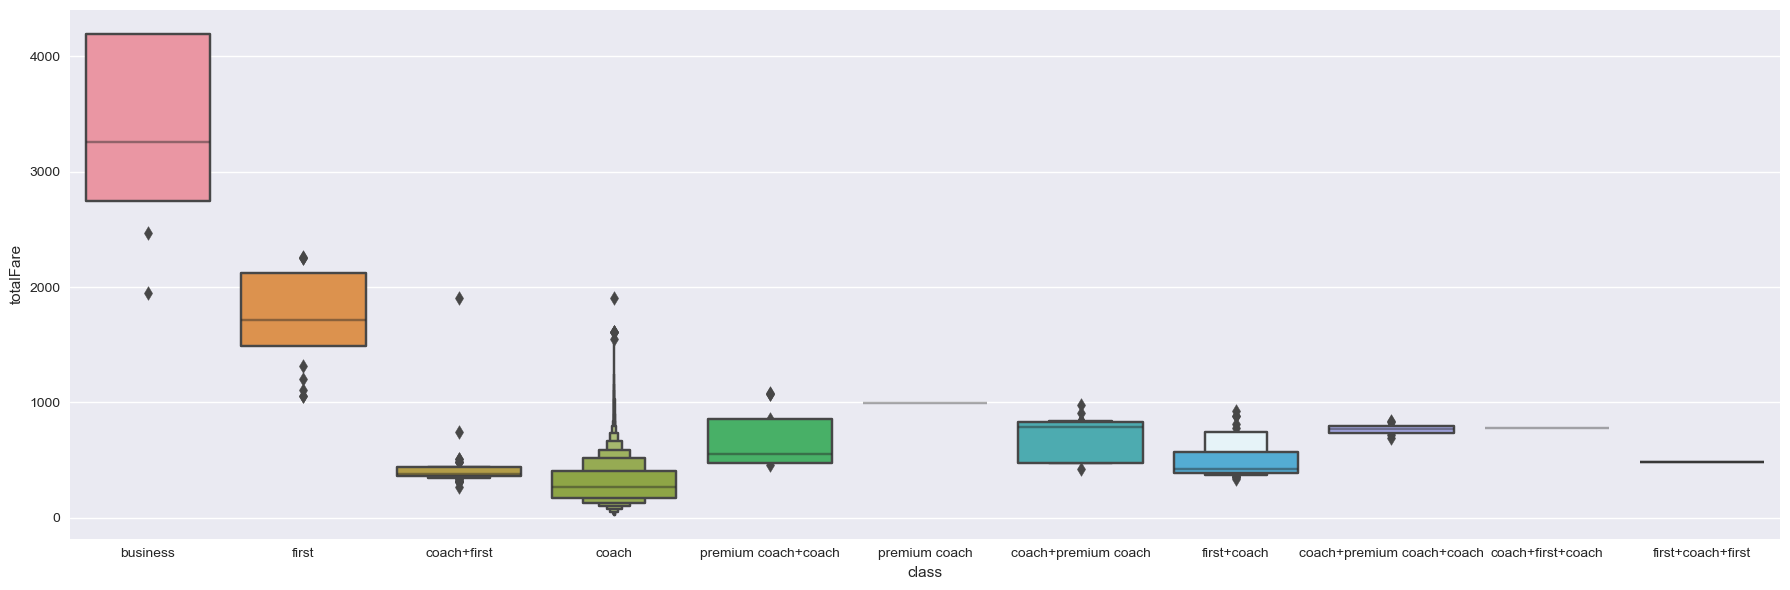

In [8]:
sns.catplot(y="totalFare", x="class", data=eda_data.sort_values("totalFare", ascending=False),
            kind="boxen", height=6,
            aspect=3)
plt.show()

Moreover, airline carry some key information on the distribution of prices, some are large, some are small. We shall call them 'outliers'

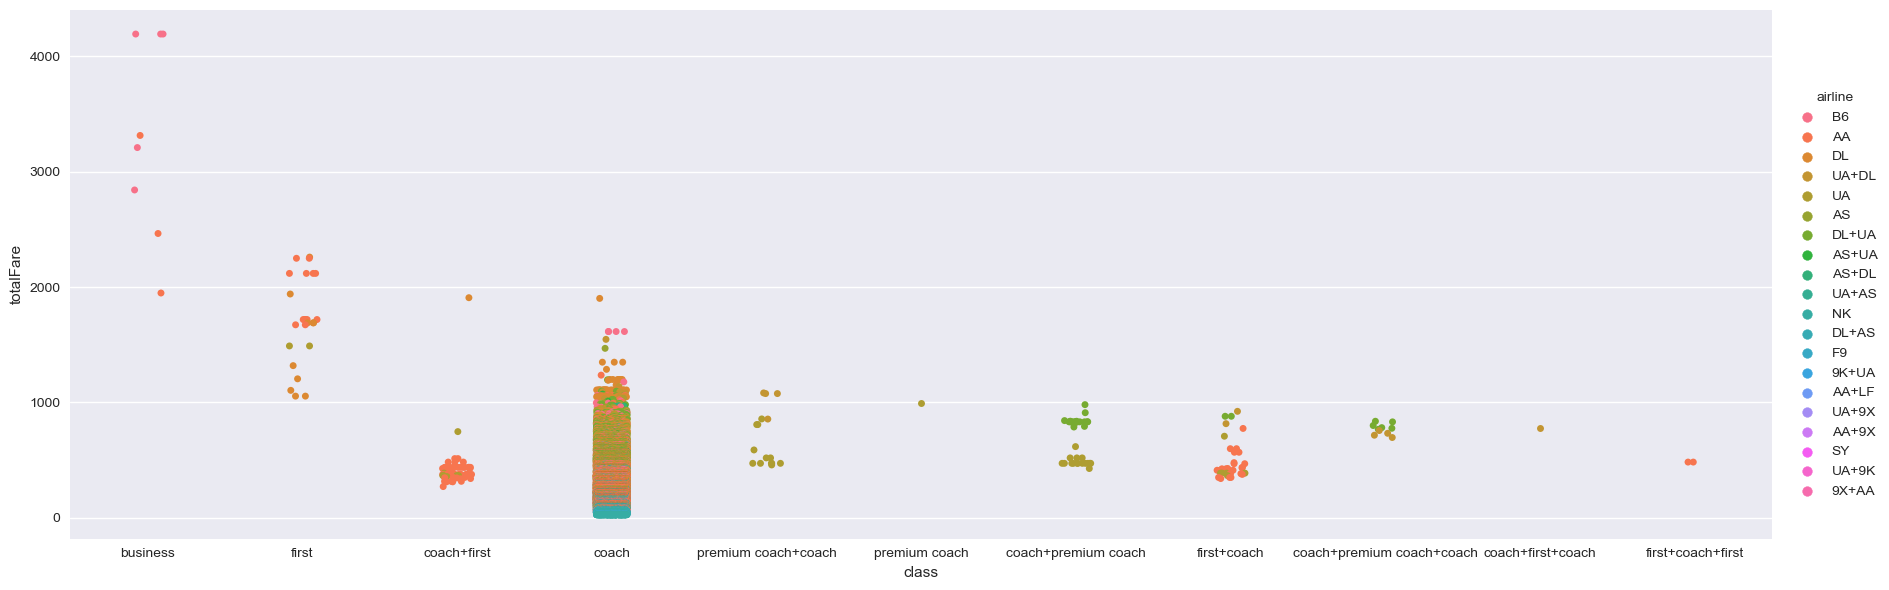

In [9]:
sns.catplot(y="totalFare", x="class", data=eda_data.sort_values("totalFare", ascending=False), hue='airline',
            height=6,
            aspect=3)
plt.show()

* Class vs totalFare indicating make a new feature isBusi_First

In [10]:
eda_data['air_route'] = eda_data['startingAirport'] + '->' + eda_data['destinationAirport']
eda_data

days_to_depart  flight_day_of_week startingAirport destinationAirport  \
0                  44                   3             LAX                ORD   
1                  44                   3             LAX                ORD   
2                  44                   3             LAX                ORD   
3                  44                   3             LAX                ORD   
4                  44                   3             LAX                ORD   
...               ...                 ...             ...                ...   
88784              53                   5             ATL                ORD   
88785              53                   5             ATL                ORD   
88786              53                   5             ATL                ORD   
88787              53                   5             ATL                ORD   
88788              53                   5             ATL                ORD   

      departure_time arriving_time  isDeparture_time_6to18  \
0           12:55:00      00:54:00                    True   
1           15:21:00      21:24:00                    True   
2           07:00:00      13:04:00                    True   
3           20:25:00      04:13:00                   False   
4           19:25:00      04:13:00                   False   
...              ...           ...                     ...   
88784       11:18:00      16:05:00                    True   
88785       12:24:00      17:15:00                    True   
88786       11:42:00      17:49:00                    True   
88787       17:45:00      18:59:00                    True   
88788       18:15:00      21:06:00                   False   

       isArriving_time_11to24  stops          route  ... elapsedDays  \
0                       False      1  LAX->DFW->ORD  ...           1   
1                        True      0       LAX->ORD  ...           0   
2                        True      0       LAX->ORD  ...           0   
3                       False      1  LAX->LAS->ORD  ...           1   
4                       False      1  LAX->LAS->ORD  ...           1   
...                       ...    ...            ...  ...         ...   
88784                    True      1  ATL->DCA->ORD  ...           0   
88785                    True      1  ATL->DFW->ORD  ...           0   
88786                    True      1  ATL->JFK->ORD  ...           0   
88787                    True      0       ATL->ORD  ...           0   
88788                    True      1  ATL->DTW->ORD  ...           0   

      isBasicEconomy  isRefundable  isNonStop  seatsRemaining  \
0              False         False      False               0   
1              False         False       True               0   
2              False         False       True               0   
3              False         False      False               0   
4              False         False      False               0   
...              ...           ...        ...             ...   
88784          False         False      False               7   
88785          False         False      False               7   
88786          False         False      False               7   
88787          False         False       True               9   
88788          False         False      False               9   

       totalTravelDistance  total_waiting_time  baseFare  totalFare  air_route  
0                      NaN                4.37     21.11      91.29   LAX->ORD  
1                      NaN                0.00     43.00      99.89   LAX->ORD  
2                      NaN                0.00     43.00      99.89   LAX->ORD  
3                      NaN                0.92     33.00     103.18   LAX->ORD  
4                      NaN                1.92     33.00     103.18   LAX->ORD  
...                    ...                 ...       ...        ...        ...  
88784               1135.0                1.67    175.81     213.20   ATL->ORD  
88785  

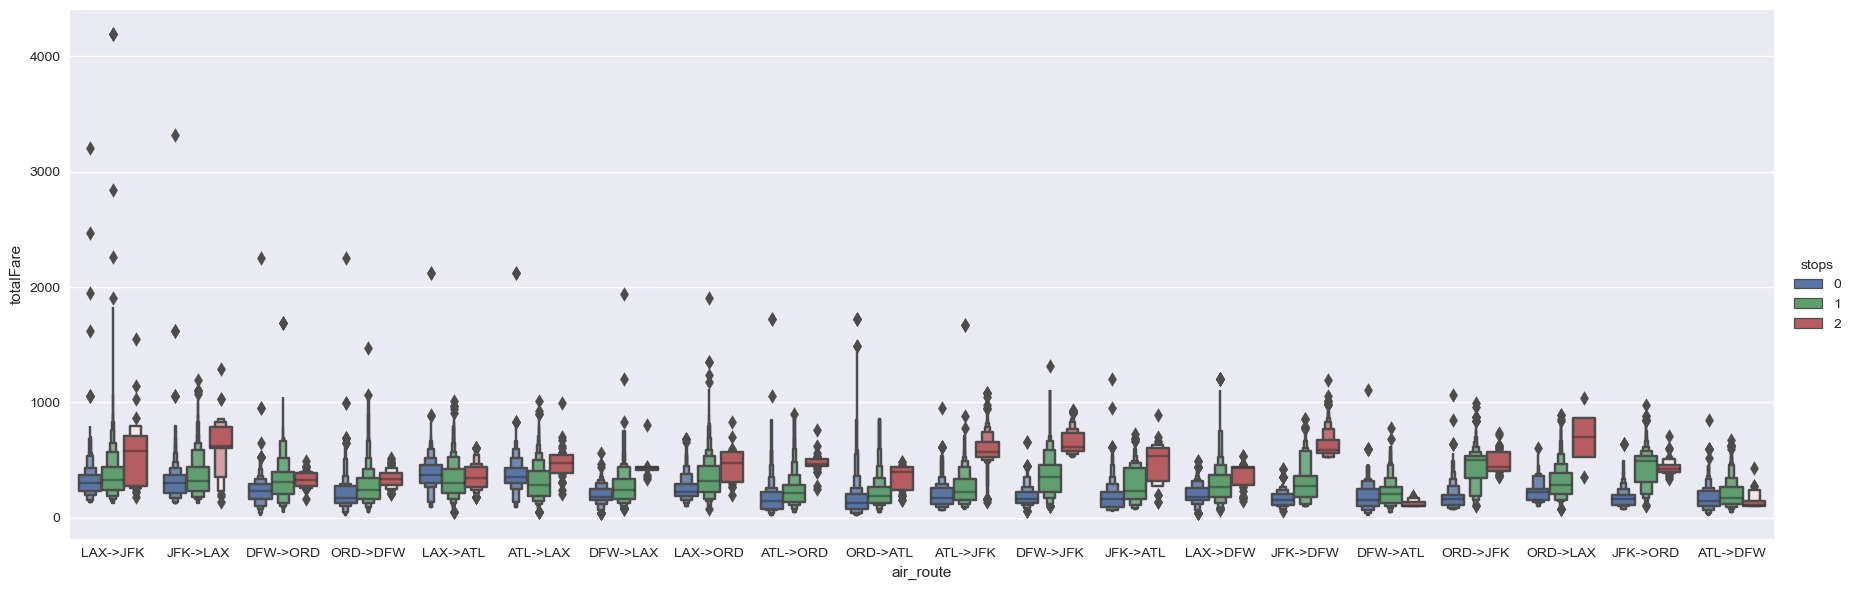

In [11]:
sns.catplot(y="totalFare", x="air_route", data=eda_data.sort_values("totalFare", ascending=False), hue='stops',
            kind="boxen",
            height=6,
            aspect=3)
plt.show()

In [12]:
fig = px.box(eda_data.sort_values("totalFare", ascending=False), y="totalFare", x='airline',
             color_discrete_sequence=["orange"], template='seaborn', height=400, width=900)
fig.show()

#### Check whether travel duration is an important factor to totalFare

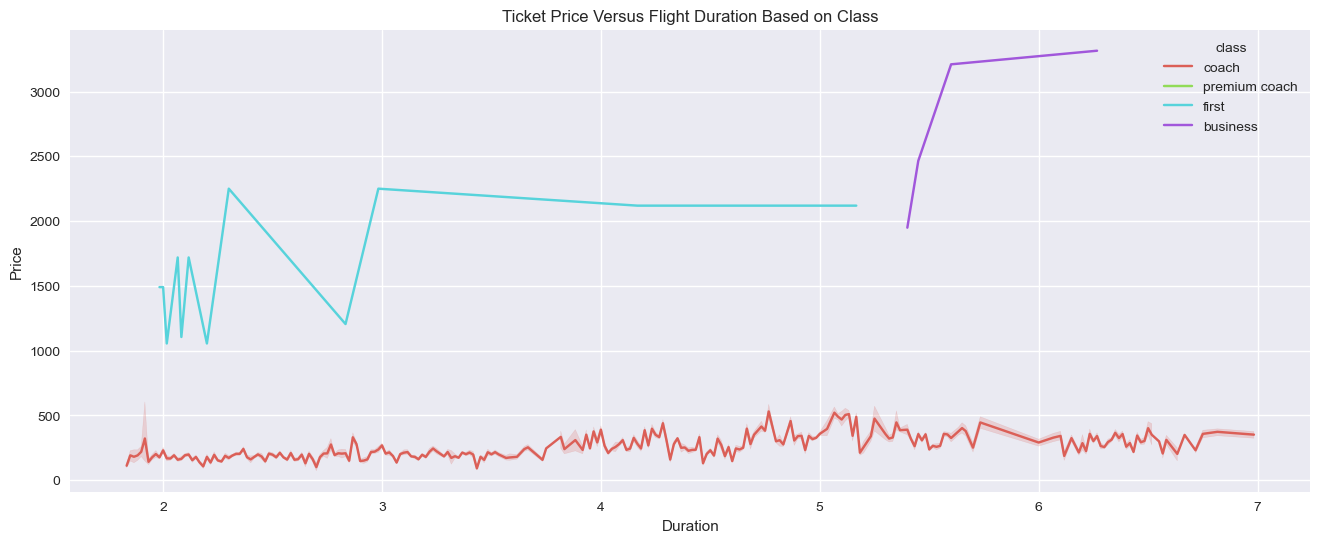

In [13]:
plt.figure(figsize=(16, 6))
sns.lineplot(data=eda_data[eda_data['stops'] == 0], x='travelDuration_h', y='totalFare', hue='class', palette='hls')
plt.title('Ticket Price Versus Flight Duration Based on Class')
plt.xlabel('Duration')
plt.ylabel('Price')
plt.show()

#### Check whether days_to_depart is important to totalFare

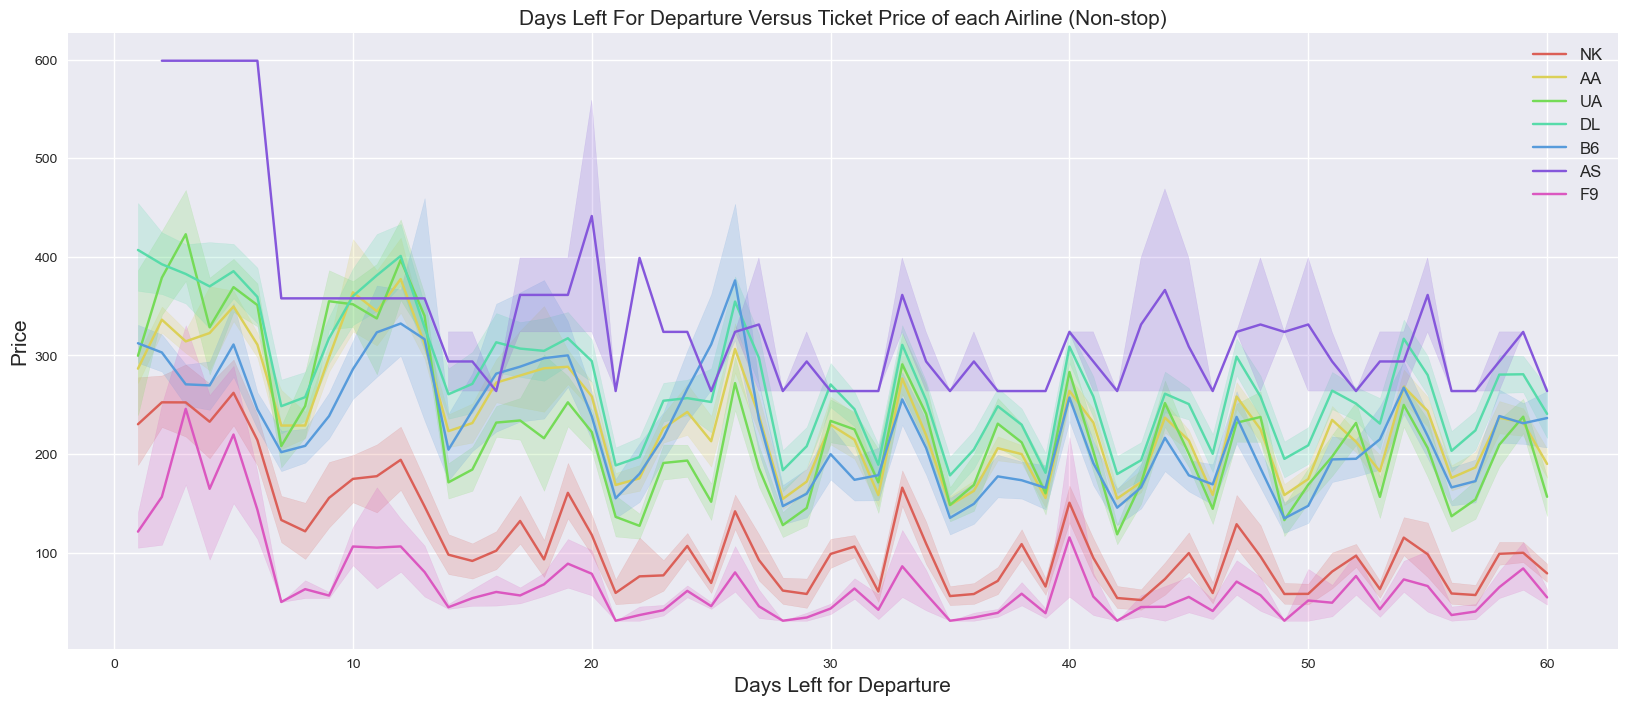

In [14]:
plt.figure(figsize=(20, 8))
sns.lineplot(data=eda_data[eda_data['stops'] == 0]
             , x='days_to_depart', y='totalFare', color='blue', hue='airline', palette='hls')
plt.title('Days Left For Departure Versus Ticket Price of each Airline (Non-stop)', fontsize=15)
plt.legend(fontsize=12)
plt.xlabel('Days Left for Departure', fontsize=15)
plt.ylabel('Price', fontsize=15)
plt.show()

#### Check continuous data distribution

/var/folders/_j/x8h1yttn1s76k8f3bvjm72rw0000gn/T/ipykernel_30733/1580414166.py:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




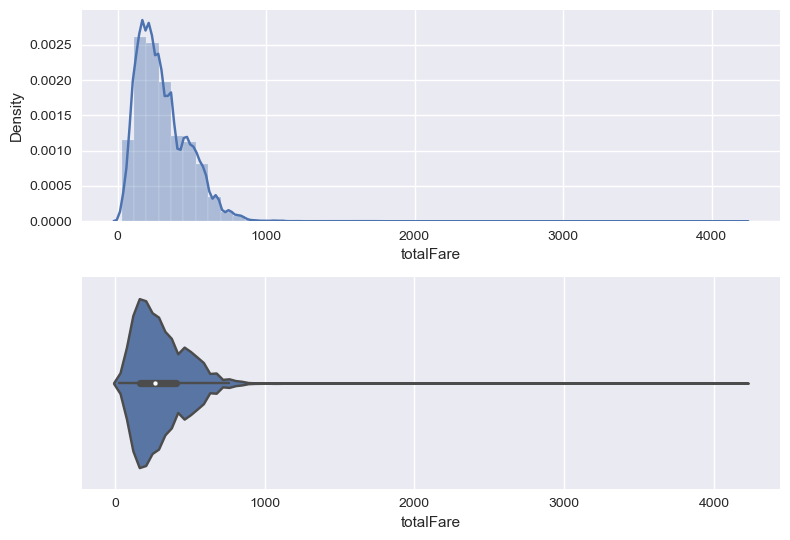

In [15]:
def plot_density(df, col):
    fig, (ax1, ax2) = plt.subplots(2, 1)
    sns.distplot(df[col], ax=ax1)
    sns.violinplot(x=df[col], ax=ax2)
    plt.tight_layout()


plot_density(eda_data, 'totalFare')

#### Check correlation between features

In [30]:
eda_data_features = eda_data.drop('totalFare',axis=1)
eda_data_features = eda_data_features.drop('baseFare',axis=1)
eda_data_features = eda_data_features.drop('route',axis=1)

In [31]:
bool_cols = eda_data_features.select_dtypes(include=['bool']).columns.tolist()
eda_data_features[bool_cols] = eda_data_features[bool_cols].astype(float)
cat_cols = eda_data_features.select_dtypes(include=['object']).columns
num_cols = eda_data_features.select_dtypes(include=['number']).columns
data_cat = eda_data_features[cat_cols]
data_num = eda_data_features[num_cols]

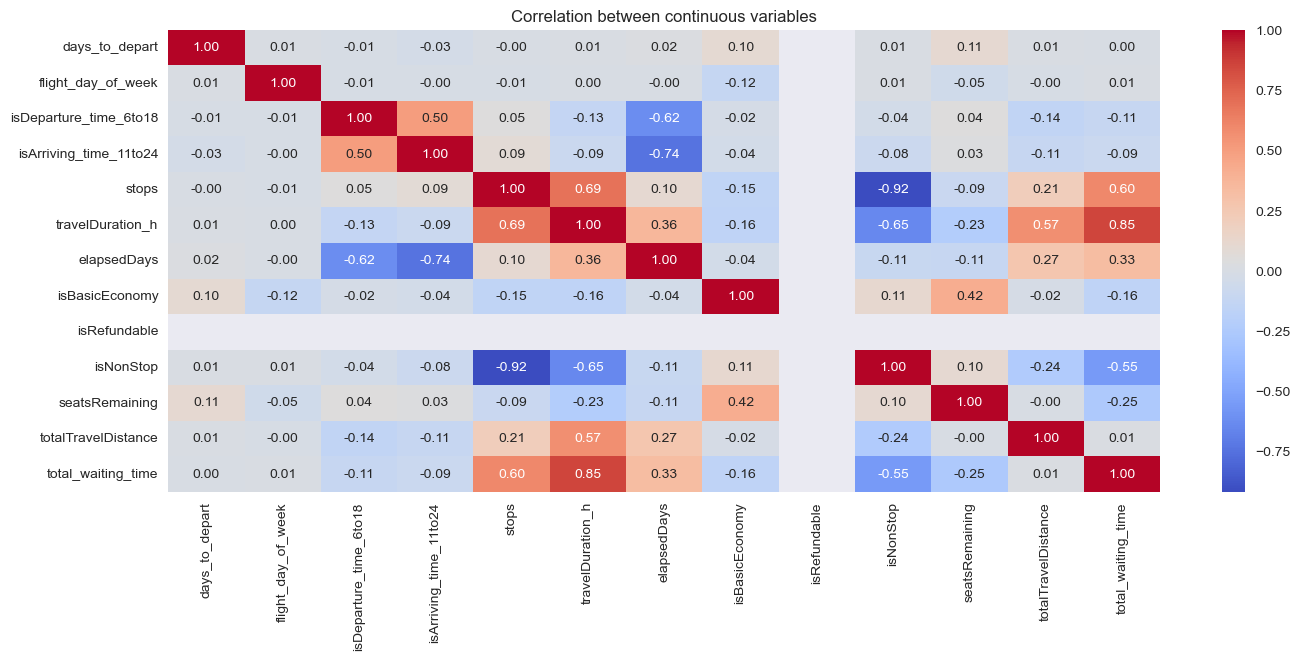

In [32]:
corr_num1 = data_num.corr()
plt.figure(figsize=(16, 6))
sns.heatmap(corr_num1, annot=True, fmt=".2f", cmap="coolwarm")
plt.title('Correlation between continuous variables')
plt.show()

Noticed that isRefundable is always 0, the reason is the value of this variable is always 0, should be dropped.

Also noticed that 'total_waiting_time' and 'travel_duration' have high correlation.

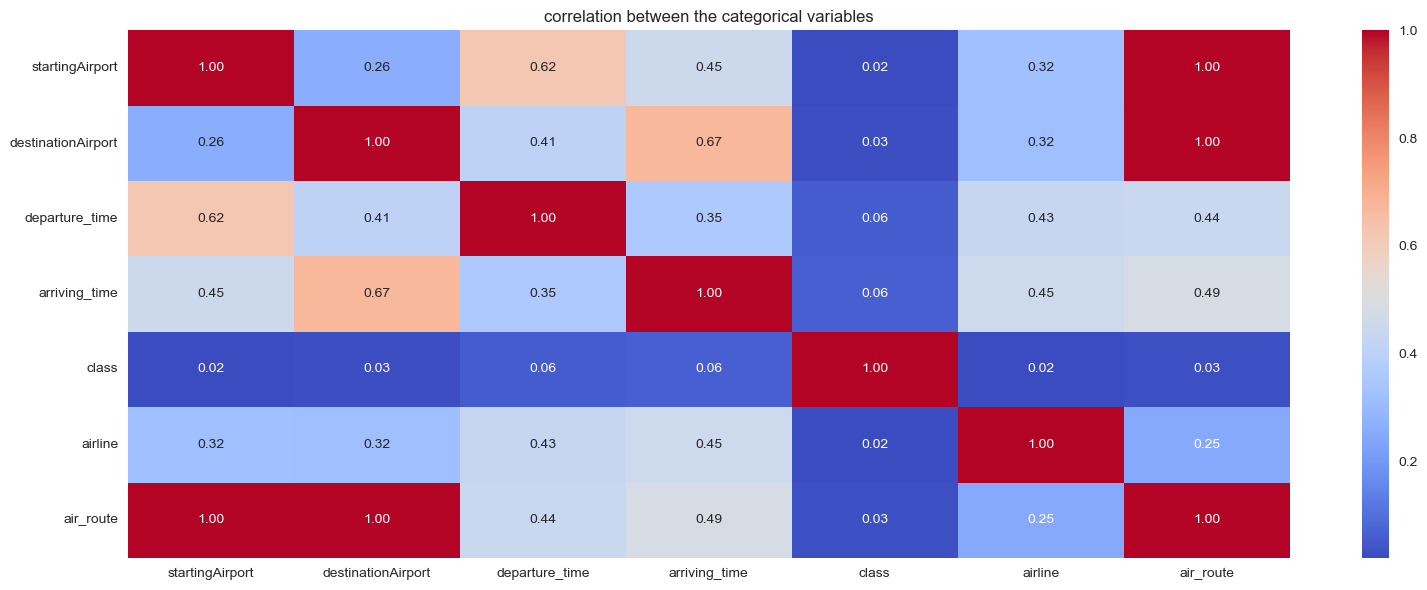

startingAirport          5
destinationAirport       5
departure_time         958
arriving_time         1142
class                   11
airline                 20
air_route               20
dtype: int64

In [33]:
from scipy.stats import chi2_contingency
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    rcorr = r - ((r - 1) ** 2) / (n - 1)
    kcorr = k - ((k - 1) ** 2) / (n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))
corr_cate = np.zeros((len(data_cat.columns), len(data_cat.columns)))
for i, col1 in enumerate(data_cat.columns):
    for j, col2 in enumerate(data_cat.columns):
        corr_cate[i, j] = cramers_v(data_cat[col1], data_cat[col2])

corr_df_cate = pd.DataFrame(corr_cate, columns=data_cat.columns, index=data_cat.columns)
plt.figure(figsize=(16, 6))
sns.heatmap(corr_df_cate, annot=True, fmt=".2f", cmap="coolwarm")
plt.title('correlation between the categorical variables')
plt.tight_layout()
plt.show()
data_cat.nunique()